In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")
#df.unique().sort_values()

## Read and load data

##### Loading the Application data  from csv

In [95]:
Application_Data = pd.read_csv("application_data.csv", encoding="unicode_escape")

#### Inspecting Application_Data dataframe (shape, info, describe etc.) 

In [96]:
Application_Data.shape

(307511, 122)

In [97]:
Application_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [98]:
Application_Data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [99]:
Application_Data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


### Column wise null percentages

#### Inspecting the Application_Data dataframe. Calculating the null percentages in each column

In [100]:
#Calculating the column wise null percentages and roundinng off to 2 decimal places
Application_Data_Null = round(100*Application_Data.isnull().sum(axis = 0) / len(Application_Data.index), 2)

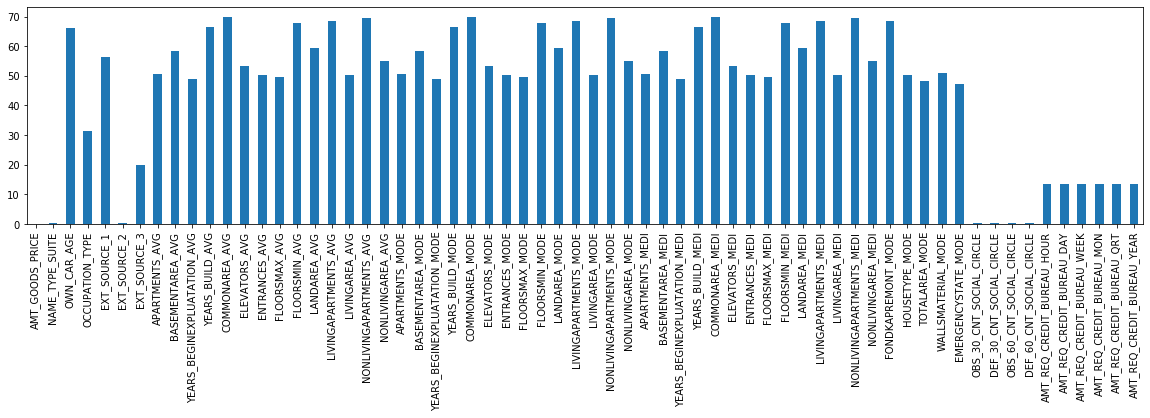

In [101]:
Application_Data_Null.iloc[Application_Data_Null.nonzero()].sort_values(ascending=False, inplace=True)
plt.figure(figsize=(20,4))
Application_Data_Null[Application_Data_Null>0].plot.bar()

### Handling column wise Null values 
#### Clearly, this dataframe has a high null percentages for a number of columns. Removing all the columns having null percentage greater than 50.

In [102]:
#Get the list of columns that need to be dropped (Null percent > 50)
Cols_To_Drop = list(Application_Data_Null[Application_Data_Null.values>=50].index)
Application_Data.drop(labels=Cols_To_Drop, inplace=True , axis=1)
len(Cols_To_Drop)

41

In [103]:
#Verify if the required columns have been dropped
Application_Data.shape

(307511, 81)

    As observed, 81 columns remain. Hence, 122 - 81 = 41 columns have been dropped

### Imputing values in columns

#### For columns with small null percentages, say less than 15%, we will impute some value

In [104]:
#TBD

## Subset Dataframe 
#### Subsetting the Application_Data dataframe to get relevant 30 columns as per ourunderstanding for further analysis.

    Selected the following columns:
    1. SK_ID_CURR
    2. TARGET
    3. NAME_CONTRACT_TYPE
    4. CODE_GENDER
    5. FLAG_OWN_REALTY
    6. CNT_CHILDREN
    7. AMT_INCOME_TOTAL
    8. AMT_CREDIT
    9. AMT_ANNUITY
    10. NAME_INCOME_TYPE
    11. NAME_EDUCATION_TYPE
    12. NAME_FAMILY_STATUS
    13. REGION_POPULATION_RELATIVE
    14. DAYS_BIRTH
    15. DAYS_EMPLOYED
    16. FLAG_MOBIL
    17. FLAG_CONT_MOBILE
    18. OCCUPATION_TYPE
    19. CNT_FAM_MEMBERS
    20. REGION_RATING_CLIENT_W_CITY
    21. WEEKDAY_APPR_PROCESS_START
    22. REG_REGION_NOT_LIVE_REGION
    23. ORGANIZATION_TYPE
    24. EXT_SOURCE_2
    25. DEF_30_CNT_SOCIAL_CIRCLE
    26. DAYS_LAST_PHONE_CHANGE
    27. FLAG_DOCUMENT_2
    28. FLAG_DOCUMENT_3
    29. AMT_REQ_CREDIT_BUREAU_HOUR
    30. AMT_REQ_CREDIT_BUREAU_WEEK

In [105]:
#Subsetting the Application_Data dataframe toget the required columns
Required_Columns = ['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY',
                   'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'NAME_INCOME_TYPE',
                   'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
                   'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_CONT_MOBILE', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
                   'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
                   'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'DEF_30_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE',
                   'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_WEEK']

Revised_Application_Data = Application_Data[Required_Columns]

In [106]:
#Verfiy Revised dataframe after subsetting
Revised_Application_Data.shape

(307511, 30)

#### Checking the data types of selected columns in Revised_Application_Data

In [107]:
Revised_Application_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 30 columns):
SK_ID_CURR                     307511 non-null int64
TARGET                         307511 non-null int64
NAME_CONTRACT_TYPE             307511 non-null object
CODE_GENDER                    307511 non-null object
FLAG_OWN_REALTY                307511 non-null object
CNT_CHILDREN                   307511 non-null int64
AMT_INCOME_TOTAL               307511 non-null float64
AMT_CREDIT                     307511 non-null float64
AMT_ANNUITY                    307499 non-null float64
NAME_INCOME_TYPE               307511 non-null object
NAME_EDUCATION_TYPE            307511 non-null object
NAME_FAMILY_STATUS             307511 non-null object
REGION_POPULATION_RELATIVE     307511 non-null float64
DAYS_BIRTH                     307511 non-null int64
DAYS_EMPLOYED                  307511 non-null int64
FLAG_MOBIL                     307511 non-null int64
FLAG_CONT_MOBILE           

<font color="blue">As observed, following columns have incorrect data types:</font>
    1. CNT_FAM_MEMBERS (Float) should be int64
    2. DEF_30_CNT_SOCIAL_CIRCLE (Float) should be int64
    3. DAYS_LAST_PHONE_CHANGE (Float) should be int64
    4. AMT_REQ_CREDIT_BUREAU_HOUR (Float) should be int64
    5. AMT_REQ_CREDIT_BUREAU_WEEK (Float) should be int64

### Fixing to correct data type of columns

In [108]:
#Fixing the data type for CNT_FAM_MEMBERS, DEF_30_CNT_SOCIAL_CIRCLE, DAYS_LAST_PHONE_CHANGE,
#AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_WEEK
Revised_Application_Data.CNT_FAM_MEMBERS = Revised_Application_Data.CNT_FAM_MEMBERS.astype('Int64')
Revised_Application_Data.DEF_30_CNT_SOCIAL_CIRCLE = Revised_Application_Data.DEF_30_CNT_SOCIAL_CIRCLE.astype('Int64')
Revised_Application_Data.DAYS_LAST_PHONE_CHANGE = Revised_Application_Data.DAYS_LAST_PHONE_CHANGE.astype('Int64')
Revised_Application_Data.AMT_REQ_CREDIT_BUREAU_HOUR = Revised_Application_Data.AMT_REQ_CREDIT_BUREAU_HOUR.astype('Int64')
Revised_Application_Data.AMT_REQ_CREDIT_BUREAU_WEEK = Revised_Application_Data.AMT_REQ_CREDIT_BUREAU_WEEK.astype('Int64')

In [109]:
#Verify the changes in our Revised_Application_Data
Revised_Application_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 30 columns):
SK_ID_CURR                     307511 non-null int64
TARGET                         307511 non-null int64
NAME_CONTRACT_TYPE             307511 non-null object
CODE_GENDER                    307511 non-null object
FLAG_OWN_REALTY                307511 non-null object
CNT_CHILDREN                   307511 non-null int64
AMT_INCOME_TOTAL               307511 non-null float64
AMT_CREDIT                     307511 non-null float64
AMT_ANNUITY                    307499 non-null float64
NAME_INCOME_TYPE               307511 non-null object
NAME_EDUCATION_TYPE            307511 non-null object
NAME_FAMILY_STATUS             307511 non-null object
REGION_POPULATION_RELATIVE     307511 non-null float64
DAYS_BIRTH                     307511 non-null int64
DAYS_EMPLOYED                  307511 non-null int64
FLAG_MOBIL                     307511 non-null int64
FLAG_CONT_MOBILE           

<font color="blue">Data types of the following columns have been fixed:</font>
    1. CNT_FAM_MEMBERS - int64
    2. DEF_30_CNT_SOCIAL_CIRCLE - int64
    3. DAYS_LAST_PHONE_CHANGE - int64
    4. AMT_REQ_CREDIT_BUREAU_HOUR - int64
    5. AMT_REQ_CREDIT_BUREAU_WEEK - int64

## Outlier Handling
#### CNT_CHILDREN

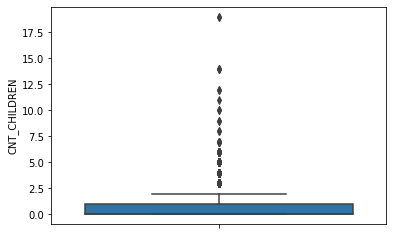

In [110]:
#We will boxplot nuerical type columns and observe for outliers

#Outlier Handling for CNT_CHILDREN
sns.boxplot(y = Revised_Application_Data.CNT_CHILDREN, data = Revised_Application_Data)

In [111]:
Revised_Application_Data.CNT_CHILDREN.value_counts()

0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
19         2
12         2
10         2
9          2
8          2
11         1
Name: CNT_CHILDREN, dtype: int64

In [112]:
Revised_Application_Data.CNT_CHILDREN.quantile([0.75, 0.90, 0.99])

0.75    1.0
0.90    2.0
0.99    3.0
Name: CNT_CHILDREN, dtype: float64

### As observed, 99 percentile of data have 3 children, so it safe to remove rows with CNT_CHILDREN greater than 3.

In [121]:
#Keeping only those rows where CNT_CHILDREN <= 3
Revised_Application_Data = Revised_Application_Data[Revised_Application_Data.CNT_CHILDREN <= 3]

#Verify the CNT_CHILDREN column again after dropping rows
Revised_Application_Data.CNT_CHILDREN.value_counts()

0    215371
1     61119
2     26749
3      3717
Name: CNT_CHILDREN, dtype: int64

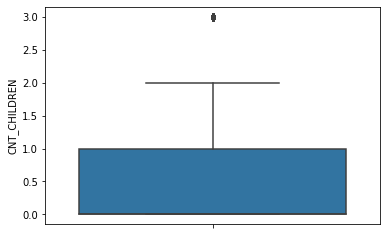

In [122]:
sns.boxplot(y = Revised_Application_Data.CNT_CHILDREN, data = Revised_Application_Data)

#### The above data point observed at CNT_CHILDREN = 3 is not considered as an outlier as it is just a high value for CNT_CHILDREN which is normal

#### AMT_CREDIT

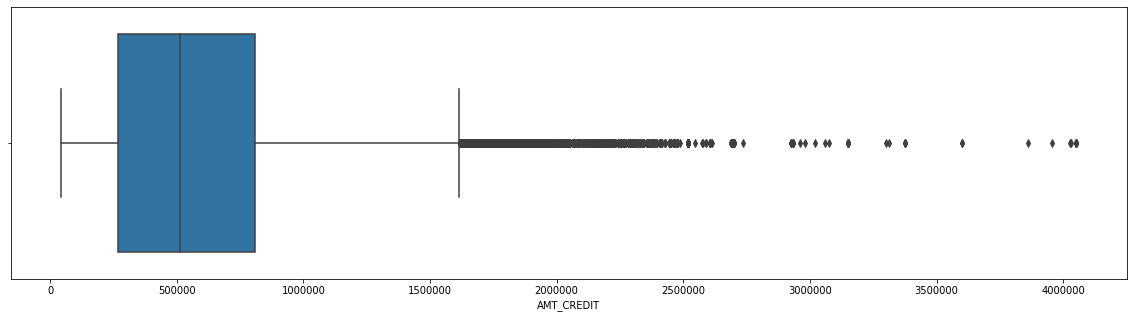

In [131]:
#Outlier Handling for AMT_CREDIT
plt.figure(figsize=[20,5])
sns.boxplot(x = Revised_Application_Data.AMT_CREDIT, data = Revised_Application_Data)

#### REGION_POPULATION_RELATIVE 

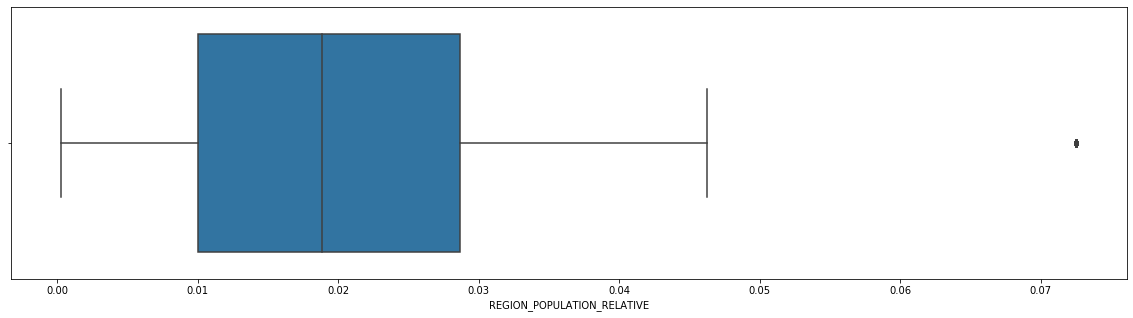

In [132]:
#Outlier Handling for REGION_POPULATION_RELATIVE
plt.figure(figsize=[20,5])
sns.boxplot(x = Revised_Application_Data.REGION_POPULATION_RELATIVE, data = Revised_Application_Data)

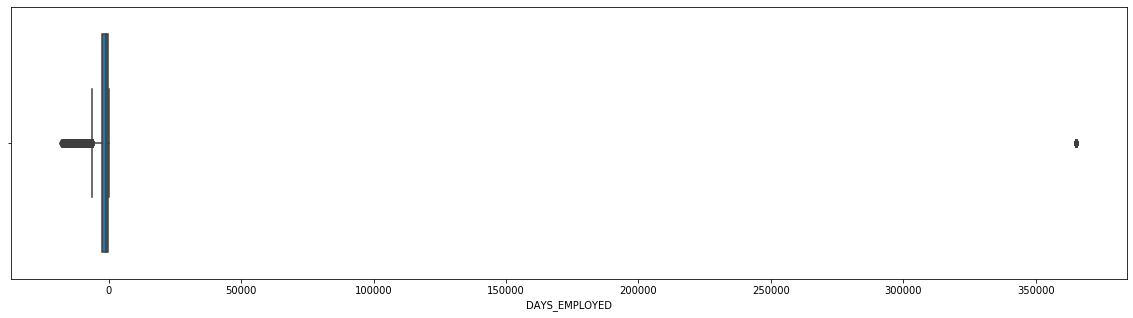

In [133]:
#Outlier Handling for REGION_POPULATION_RELATIVE
plt.figure(figsize=[20,5])
sns.boxplot(x = Revised_Application_Data.DAYS_EMPLOYED, data = Revised_Application_Data)

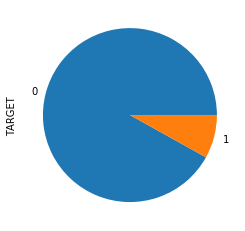

In [80]:
Revised_Application_Data.TARGET.value_counts(normalize=True).plot.pie()